In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

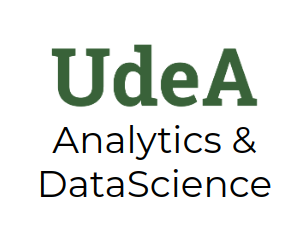

In [2]:
Image('../docs/udea-datascience.png')

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

*   **Nombres Completos**: Maria del mar Ipia Guzmán
*   **Número de Cédula**: 1214726595


*   **Nombres Completos**: Johan Arbey Vargas Mejia
*   **Número de Cédula**: 1152195956


Bienvenido al segundo taller de Estadística y Análisis Exploratorio. Esta es una de las tres fuentes de datos disponibles para presentar el taller. Tan solo debes escoger una y realizar los pasos indicados. ¡Mucha suerte!

# Descripción de la base de datos A 🍷 (Cuantitativa)

**Name:** Wine Quality

**Website:** https://archive.ics.uci.edu/ml/datasets/wine+quality

**Description:** 

The dataset is related to a red variant of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link](http://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Additionally, there is some missing data from the dataset.

**Attribute Information**


For more information, read [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016).

**Input variables (based on physicochemical tests):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

**Output variable (based on sensory data):**
1. quality (score between 0 and 10)

Cargue el archivo winequality.csv desde la siguiente URL.

## Librerías

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
from scipy.special import entr
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

%matplotlib inline
plt.style.use('ggplot')

In [4]:
wine_url = 'https://raw.githubusercontent.com/analiticaycienciadatosudea/EstadisticaExploracionDatos/main/winequality.csv'
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data = pd.read_csv(wine_url, sep=';', encoding='utf8', usecols=columns)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,?,0.076,11.0,34.0,?,3.51,?,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,?,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,?,9.8,5
3,11.2,0.28,0.56,?,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,?,3.51,0.56,9.4,5


## Exploración inicial y Análisis de Datos Atípicos de los datos de A

En este apartado, se debe cargar la base de datos y generar una exploración inicial, determinando si hay datos faltantes o no y generando un reporte de las estadísticas principales como la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada variable. lUego, se debe realizar una detección de datos atípicos con un algoritmo o método de su elección.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 150.0+ KB


In [6]:
data.shape

(1599, 12)

In [7]:
def find_missing(df, missing):
    lista = []
    for col in df.columns:
        num = df[df[col] == missing].shape[0]
        lista.append(num)
    
    dic = {
        'Columnas': df.columns,
        'Faltantes': lista}
    df_faltantes = pd.DataFrame(dic)
    
    df_faltantes['Porcentaje'] = df_faltantes['Faltantes'] / df.shape[0]
    
    return df_faltantes

In [8]:
df_faltantes = find_missing(data, '?')

In [9]:
df_faltantes

,Columnas,Faltantes,Porcentaje
0,fixed acidity,94,0.058787
1,volatile acidity,107,0.066917
2,citric acid,109,0.068168
3,residual sugar,97,0.060663
4,chlorides,104,0.065041
5,free sulfur dioxide,94,0.058787
6,total sulfur dioxide,102,0.063790
7,density,83,0.051907
8,pH,69,0.043152
9,sulphates,96,0.060038


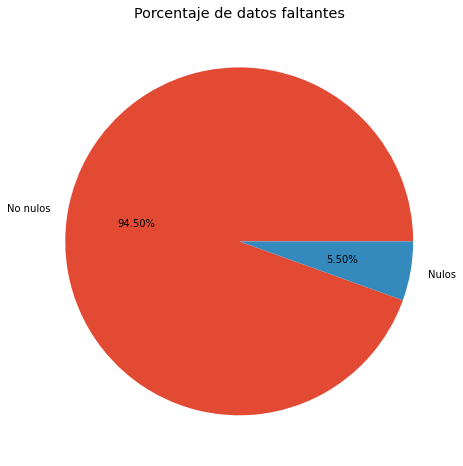

In [10]:
faltantes_total = df_faltantes['Faltantes'].sum()
registros_total = data.shape[0] * data.shape[1]

plt.figure(figsize=(8, 8))
datos = [registros_total - faltantes_total, faltantes_total]
label = ['No nulos', 'Nulos']

plt.pie(datos, labels=label, autopct='%.2f%%')
plt.title('Porcentaje de datos faltantes')
plt.show()

In [11]:
faltantes_total

1055

In [12]:
# Remmplazar los datos ? por nulos y cambiar el tipo de datos de la tabla a float
data = data.replace('?', np.nan).astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1505 non-null   float64
 1   volatile acidity      1492 non-null   float64
 2   citric acid           1490 non-null   float64
 3   residual sugar        1502 non-null   float64
 4   chlorides             1495 non-null   float64
 5   free sulfur dioxide   1505 non-null   float64
 6   total sulfur dioxide  1497 non-null   float64
 7   density               1516 non-null   float64
 8   pH                    1530 non-null   float64
 9   sulphates             1503 non-null   float64
 10  alcohol               1499 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1505.000000,1492.000000,1490.000000,1502.000000,1495.000000,1505.000000,1497.000000,1516.000000,1530.000000,1503.000000,1499.000000,1599.000000
mean,8.332159,0.527309,0.270248,2.528029,0.087443,15.918272,46.414830,0.996726,3.311386,0.659787,10.431454,5.636023
std,1.745085,0.179209,0.193030,1.414587,0.048099,10.522738,33.079014,0.001894,0.154461,0.169091,1.068366,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.092500,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Imputación de datos

In [15]:
# Reemplazamos los datos nulos con la media
imp_simple = SimpleImputer(missing_values=np.nan, strategy='mean')

In [16]:
imp_simple.fit(data)

SimpleImputer()

In [17]:
matrix = imp_simple.transform(data)

In [18]:
data = pd.DataFrame(matrix, columns=data.columns)

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,2.528029,0.076,11.0,34.0,0.996726,3.51,0.659787,9.4,5.0
1,7.8,0.88,0.00,2.600000,0.098,25.0,67.0,0.996726,3.20,0.680000,9.8,5.0
2,7.8,0.76,0.04,2.300000,0.092,15.0,54.0,0.997000,3.26,0.659787,9.8,5.0
3,11.2,0.28,0.56,2.528029,0.075,17.0,60.0,0.998000,3.16,0.580000,9.8,6.0
4,7.4,0.70,0.00,1.900000,0.076,11.0,34.0,0.996726,3.51,0.560000,9.4,5.0


In [20]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.332159,0.527309,0.270248,2.528029,0.087443,15.918272,46.414830,0.996726,3.311386,0.659787,10.431454,5.636023
std,1.692981,0.173106,0.186330,1.370981,0.046507,10.208556,32.005894,0.001844,0.151089,0.163933,1.034398,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.400000,0.100000,1.900000,0.071000,8.000000,23.000000,0.995655,3.210000,0.560000,9.500000,5.000000
50%,8.000000,0.527309,0.270248,2.200000,0.080000,15.000000,40.000000,0.996726,3.311386,0.630000,10.300000,6.000000
75%,9.100000,0.630000,0.410000,2.600000,0.089000,21.000000,60.000000,0.997740,3.400000,0.725000,11.000000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Detección de datos atípicos

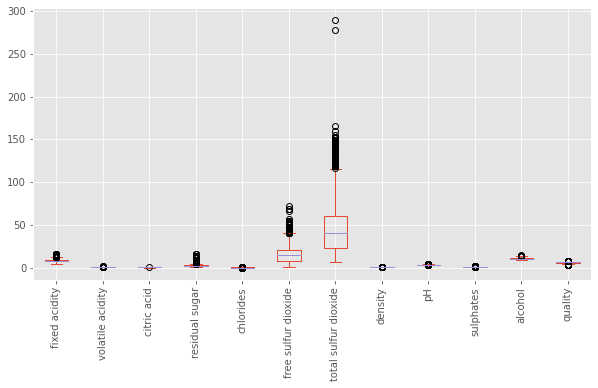

In [21]:
data.plot(kind='box', figsize=(10, 5), rot=90)
plt.show()

In [22]:
# Se seleccionan todas las columnas exceptuando la columna objetivo
caracteristicas = data.columns[0:-1]

In [23]:
data_ft = data[caracteristicas]

#### Detección de datos atípicos con el método LOF

In [24]:
lof = LocalOutlierFactor(
    n_neighbors=5, 
    algorithm='auto', 
    contamination='auto',
    metric='euclidean') 

filtrado = lof.fit_predict(data_ft) 

ground_truth = np.ones(len(data_ft), dtype=int) 

n_errors = (filtrado != ground_truth).sum()

In [25]:
n_errors

57

In [26]:
#Eliminación de datos atípicos
pos = np.where(filtrado == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
data_ft_lof = data_ft.loc[pos, :]
print("Número de muestras sin outilers:", data_ft_lof.shape[0])

Número de muestras sin outilers: 1542


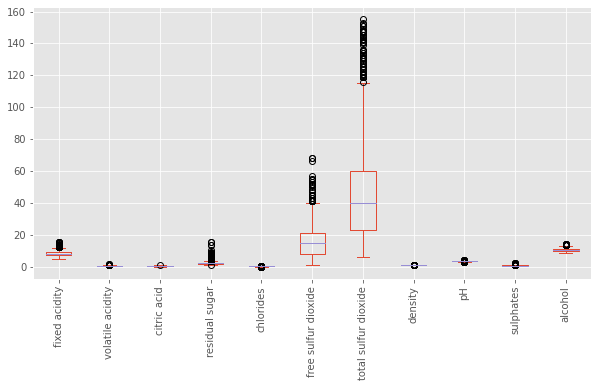

In [27]:
data_ft_lof.plot(kind='box', figsize=(10, 5), rot=90)
plt.show()

In [28]:
h_1 = entr(data_ft)
h_2 = entr(data_ft_lof)

entropia_normalizada_1 = h_1.sum() / data_ft.shape[0]
entropia_normalizada_2 = h_2.sum() / data_ft_lof.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia LOF'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)

In [29]:
Comparacion_entropias

,Entropia Original,Entropia LOF
fixed acidity,-17.829152,-17.849149
volatile acidity,0.309452,0.309355
citric acid,0.277774,0.277089
residual sugar,-2.590695,-2.375961
chlorides,0.205405,0.205914
free sulfur dioxide,-47.060445,-46.878847
total sulfur dioxide,-187.900179,-184.693929
density,0.003267,0.003263
pH,-3.968381,-3.968936
sulphates,0.256384,0.257201


#### Detección de datos atípicos rango intercuartil

In [30]:
iqr_ = iqr(data_ft, axis=0, rng=(25, 75), interpolation='midpoint')

In [31]:
q1 = np.percentile(data_ft, 25, axis=0, interpolation='midpoint')
q3 = np.percentile(data_ft, 75, axis=0, interpolation='midpoint')

min_limite = q1 - 1.5 * iqr_
max_limite = q3 + 1.5 * iqr_

print('Límites inferiores = ', min_limite)
print("\n")
print('Límites superiores = ', max_limite)

Límites inferiores =  [  4.35        0.055      -0.365       0.85        0.044     -11.5
 -32.5         0.9925275   2.925       0.3125      7.25     ]


Límites superiores =  [ 11.95        0.975       0.875       3.65        0.116      40.5
 115.5         1.0008675   3.685       0.9725     13.25     ]


C:\Users\mdmgu\AppData\Local\Temp\ipykernel_10612\1128986648.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data_ft, 25, axis=0, interpolation='midpoint')
C:\Users\mdmgu\AppData\Local\Temp\ipykernel_10612\1128986648.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(data_ft, 75, axis=0, interpolation='midpoint')


In [32]:
outliers = []
values = []
columnas = data_ft.columns
for i in range(len(columnas)):
    serie = data_ft[columnas[i]]
    min_ = min_limite[i]
    max_ = max_limite[i]
    contador = 0
    lista = []
    for value in serie.unique():
        if value < min_ or value > max_:
            contador += 1
            d = data_ft[serie == value].index
            for j in d:
                lista.append(j)
    outliers.append(contador)
    values.append(lista)

In [33]:
dic2 = {
    'Columnas': data_ft.columns,
    'Outliers': outliers
}

tabla_outliers = pd.DataFrame(dic2)

In [34]:
tabla_outliers

,Columnas,Outliers
0,fixed acidity,23
1,volatile acidity,17
2,citric acid,1
3,residual sugar,52
4,chlorides,75
5,free sulfur dioxide,17
6,total sulfur dioxide,35
7,density,33
8,pH,17
9,sulphates,35


In [35]:
set_ = set(values[0])
for m in range(1, len(values)):
    set_ = set_.intersection(set(values[m]))
    
len(set_)

0

In [36]:
indices = set(itertools.chain.from_iterable(values))

In [37]:
len(indices)

457

In [38]:
data_ft_iqr = data_ft.drop(indices)

In [39]:
h_1 = entr(data_ft)
h_2 = entr(data_ft_iqr)

entropia_normalizada_1 = h_1.sum() / data_ft.shape[0]
entropia_normalizada_2 = h_2.sum() / data_ft_iqr.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia iqr'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)

In [40]:
Comparacion_entropias

,Entropia Original,Entropia iqr
fixed acidity,-17.829152,-17.140350
volatile acidity,0.309452,0.314930
citric acid,0.277774,0.273904
residual sugar,-2.590695,-1.778197
chlorides,0.205405,0.199326
free sulfur dioxide,-47.060445,-42.468708
total sulfur dioxide,-187.900179,-160.888768
density,0.003267,0.003425
pH,-3.968381,-3.998771
sulphates,0.256384,0.278856


In [41]:
data_clean = data.iloc[data_ft_iqr.index]

## Análisis Estadístico

En este apartado, los datos filtrados de la sección anterior (Análisis de Datos Atípicos) deben ser analizados mediante test estadísticos de acuerdo al tipo de variable (cualitativo, cuantitativo, etc...). Determinar si los datos siguen una determinada distribución de probabilidad y si hay o no correlacción entre las variables.

### KS Test

In [42]:
nombres = ['beta', 'gamma', 'expon', 'chi2', 'norm', 't', 'uniform']
ks_valor = []
p_valor = []

for distribuciones in nombres:
    dis = getattr(stats, distribuciones)
    for n in data_clean.columns:
        A = np.asarray(data_clean[n])
        parametro = dis.fit(A)
        D, p = stats.kstest(data_clean[n], distribuciones, N=50, mode="auto", args=parametro)
        
        pp = np.around(p, 10)
        DD = np.around(D, 5)
        
        p_valor.append(pp)
        ks_valor.append(DD)

ks_valor = np.asarray(ks_valor)
p_valor = np.asarray(p_valor)

ks_valor = ks_valor.reshape(len(nombres), data_clean.shape[1])
p_valor = p_valor.reshape(len(nombres), data_clean.shape[1])

ks_valor = pd.DataFrame(ks_valor, index=nombres, columns=data_clean.columns)
p_valor = pd.DataFrame(p_valor, index=nombres, columns=data_clean.columns)

C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\mdmgu\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [43]:
p_valor > 0.05

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
beta,False,False,False,False,False,False,False,False,False,False,False,False
gamma,False,False,False,False,False,False,False,False,False,False,False,False
expon,False,False,False,False,False,False,False,False,False,False,False,False
chi2,False,False,False,False,False,False,False,False,False,False,False,False
norm,False,False,False,False,False,False,False,False,False,False,False,False
t,False,False,False,False,False,False,False,True,False,False,False,False
uniform,False,False,False,False,False,False,False,False,False,False,False,False


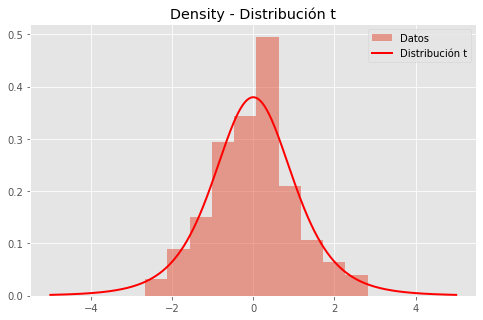

In [44]:
df = 5 

density = data_clean['density']

mean = np.mean(density)
std = np.std(density)
data_scaled = (density - mean) / std

plt.figure(figsize=(8, 5))

t_statistic, p_value = stats.kstest(data_scaled, 't', args=(df,))

plt.hist(data_scaled, density=True, alpha=0.5, label='Datos')
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df), 'r', lw=2, label='Distribución t')
plt.legend()
plt.title('Density - Distribución t')
plt.show()

### Correlación

In [45]:
r = []
valor_p = []

columns = data_clean.columns

for n in columns:
    for m in columns:  
        r_valor, p_valor = pearsonr(data_clean[n], data_clean[m])
        r.append(r_valor)
        valor_p.append(p_valor)

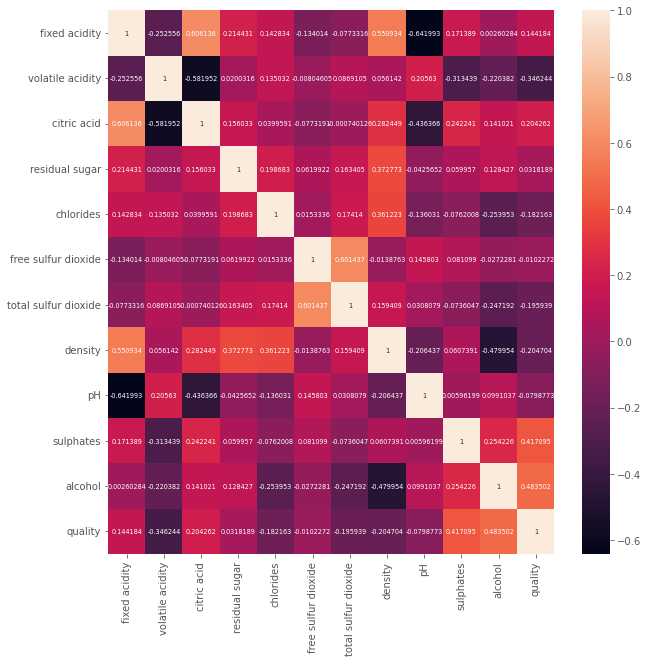

In [46]:
r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(data_clean.shape[1], data_clean.shape[1])
p_value = valor_p.reshape(data_clean.shape[1], data_clean.shape[1])

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    pearson_r, 
    annot=True, 
    fmt='g', 
    xticklabels=columns, 
    yticklabels=columns, 
    annot_kws={'size': 6.5})

plt.show()

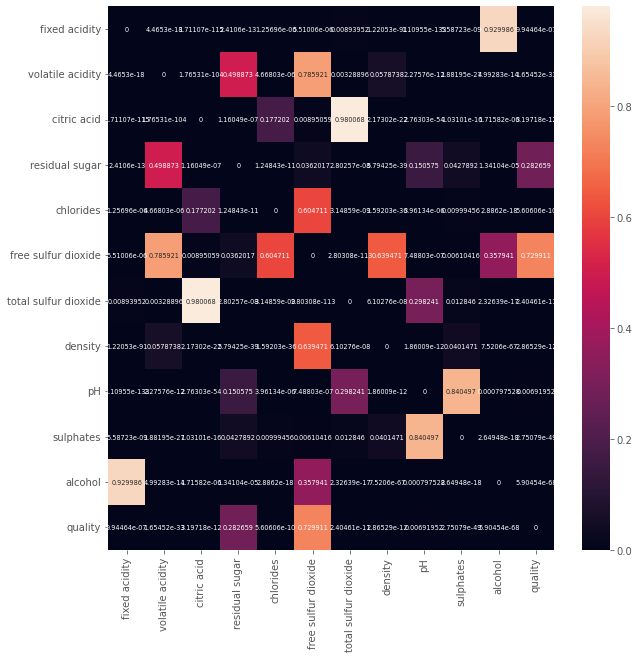

In [47]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    p_value, 
    annot=True, 
    fmt='g', 
    xticklabels=columns, 
    yticklabels=columns, 
    annot_kws={'size': 6.5})

plt.show()

#### Variables con mayor correlación

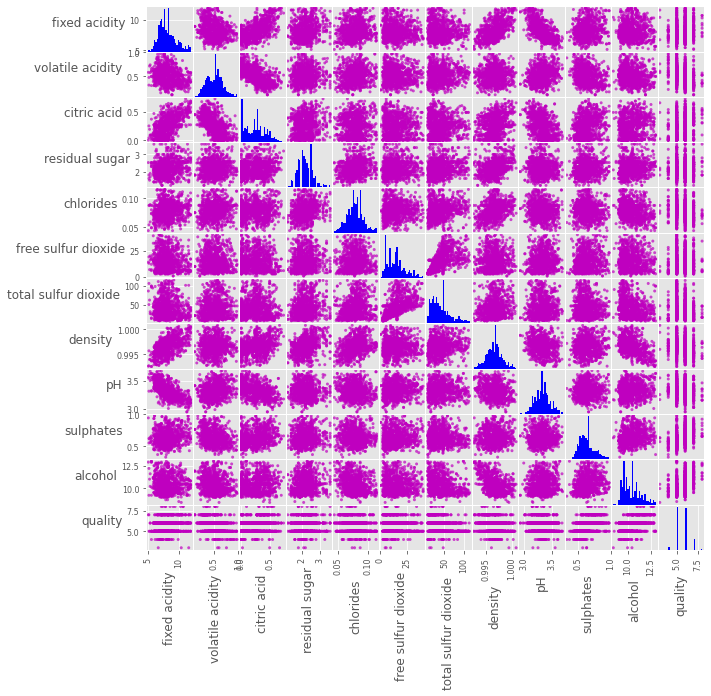

In [48]:
axes = pd.plotting.scatter_matrix(
    data_clean,
    alpha=0.7,
    figsize=(10, 10),
    range_padding=0.1,
    diagonal='hist',
    color='m',
    hist_kwds={
        'bins': 30, 
        'color': 'blue'
    }
)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

In [49]:
cor = data_clean.corr()

cor.loc[:, :] = np.tril(cor, k=-1)

cor = cor.stack()

cor[(cor > 0.55) | (cor < -0.55)]

citric acid           fixed acidity          0.606136
                      volatile acidity      -0.581952
total sulfur dioxide  free sulfur dioxide    0.601437
density               fixed acidity          0.550934
pH                    fixed acidity         -0.641993
dtype: float64

## Densidad Kernel

En este apartado, se debe encontrar una función de densidad de probabilidad por cada variable o característica de la base de datos. Luego, realizar un análisis comparativo con el análisis estadístico del item anterior.

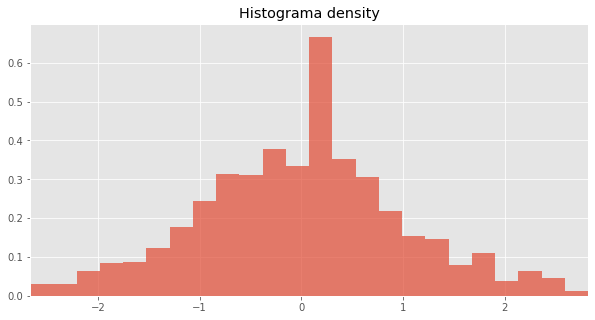

In [50]:
fig = plt.figure(figsize=(10, 5))

plt.hist(data_scaled, bins='fd', alpha=0.7, density=True)
plt.xlim(data_scaled.min(), data_scaled.max())
plt.title('Histograma density')
plt.show()

In [51]:
kde = KernelDensity(bandwidth=0.2, kernel="gaussian")
datos_stock = data_scaled.values
datos_stock = datos_stock.reshape(-1, 1)
kde.fit(datos_stock)

KernelDensity(bandwidth=0.2)

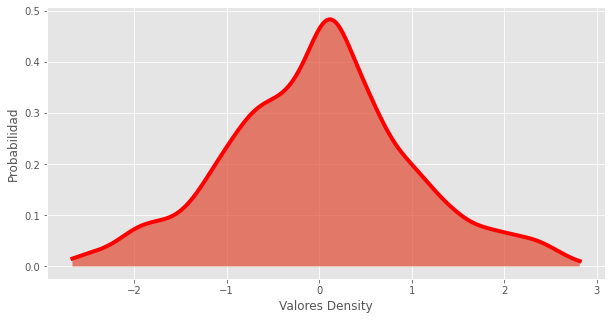

In [52]:
x_minimo = data_scaled.values.min()
x_maximo = data_scaled.values.max()
x = np.linspace(x_minimo, x_maximo, data_clean.shape[0])
Prob_Log = kde.score_samples(x.reshape(-1, 1))  

fig = plt.figure(figsize=(10, 5))

plt.fill_between(x, np.exp(Prob_Log), alpha=0.7)
plt.plot(x, np.exp(Prob_Log), 'r', linewidth=4)
plt.xlabel("Valores Density")
plt.ylabel("Probabilidad")
plt.show()

In [53]:
ancho_de_banda = np.linspace(0.1, 2, 200)  # Rango de valores de ancho de banda
GS = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": ancho_de_banda},
    cv=10,
    error_score=1e-5)

GS.fit(datos_stock)

GridSearchCV(cv=10, error_score=1e-05, estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.1       , 0.10954774, 0.11909548, 0.12864322, 0.13819095,
       0.14773869, 0.15728643, 0.16683417, 0.17638191, 0.18592965,
       0.19547739, 0.20502513, 0.21457286, 0.2241206 , 0.23366834,
       0.24321608, 0.25276382, 0.26231156, 0.2718593 , 0.28140704,
       0.29095477, 0.30050251, 0.31005025, 0.31959799, 0...
       1.67537688, 1.68492462, 1.69447236, 1.7040201 , 1.71356784,
       1.72311558, 1.73266332, 1.74221106, 1.75175879, 1.76130653,
       1.77085427, 1.78040201, 1.78994975, 1.79949749, 1.80904523,
       1.81859296, 1.8281407 , 1.83768844, 1.84723618, 1.85678392,
       1.86633166, 1.8758794 , 1.88542714, 1.89497487, 1.90452261,
       1.91407035, 1.92361809, 1.93316583, 1.94271357, 1.95226131,
       1.96180905, 1.97135678, 1.98090452, 1.99045226, 2.        ])})

In [54]:
ancho_banda_optimo = GS.best_params_
print("Ancho de banda óptimo = ", ancho_banda_optimo)

Ancho de banda óptimo =  {'bandwidth': 0.20502512562814068}


### **Relación de variables cuantitativas**


En este apartado, se hallará la relación entre las variables del conjunto de datos a través de los métodos aprendidos en clase.

In [55]:
t_test = []
valor_p = []

muestra = data_clean[0:50]

distribucion = getattr(stats, 'norm')

for col in data_clean.columns:
    A = np.asarray(muestra[col])
    parametro = distribucion.fit(A)
    media = parametro[0]
    valor_t_test, p_valor = ttest_1samp(muestra[col], media, alternative='two-sided')
    
    t_test.append(valor_t_test)
    valor_p.append(p_valor)
    
valor_p = np.asarray(valor_p)
valor_p = valor_p.reshape(1, len(data_clean.columns))
t_test = np.asarray(t_test)
t_test = t_test.reshape(1, len(data_clean.columns))

t_test = pd.DataFrame(t_test, index=['normal'], columns=data_clean.columns)
valor_p = pd.DataFrame(valor_p, index=['normal'], columns=data_clean.columns)

In [56]:
valor_p > 0.05

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
normal,True,True,True,True,True,True,True,True,True,True,True,True


In [57]:
data_clean.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [58]:
ttest_ind(data_clean['fixed acidity'], data_clean['volatile acidity'])

Ttest_indResult(statistic=190.06185426841824, pvalue=0.0)

In [59]:
t_test = []
p_valor = []

for n in data_clean.columns:
    for m in data_clean.columns:  
        statistic, pvalue = ttest_ind(data_clean[n], data_clean[m])
        t_test.append(statistic)
        p_valor.append(pvalue)
        
t_test = np.asarray(t_test)
p_valor = np.asarray(p_valor)

t_students = t_test.reshape(data_clean.shape[1], data_clean.shape[1])
p_value = p_valor.reshape(data_clean.shape[1], data_clean.shape[1])

In [60]:
df = pd.DataFrame(p_value, index=data_clean.columns, columns=data_clean.columns)

In [61]:
df > 0.05

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,False,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,False,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,False,True,False,False,False,False,False
density,False,False,False,False,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


## Escalamiento

En este apartado, se realizará un proceso de escalamiento a las columnas del conjunto de datos. Primero, grafique diagramas de cajas para visualizar la distribución de los datos. ¿Cuál es la columna con mayor cantidad de outliers? Justifique cuál es el mejor método de escalamiento en este caso.

In [62]:
# Normalización de los datos
min_max = MinMaxScaler(copy=True, feature_range=(0, 1))

array = min_max.fit_transform(data)

data_norm = pd.DataFrame(array, columns=data.columns)

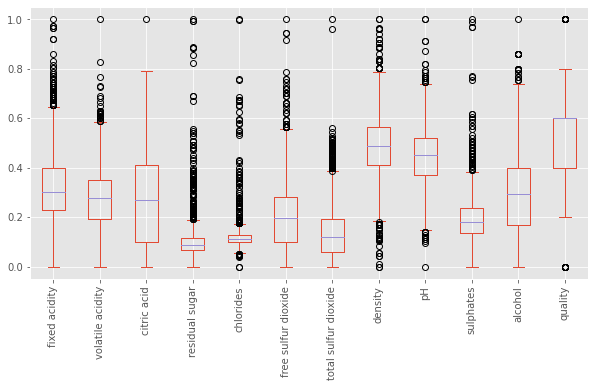

In [63]:
data_norm.plot(kind='box', figsize=(10, 5), rot=90)
plt.show()

In [64]:
tabla_outliers.sort_values('Outliers', ascending=False)

,Columnas,Outliers
4,chlorides,75
3,residual sugar,52
6,total sulfur dioxide,35
9,sulphates,35
7,density,33
0,fixed acidity,23
1,volatile acidity,17
5,free sulfur dioxide,17
8,pH,17
10,alcohol,7


In [65]:
# Normalización de los datos
min_max = MinMaxScaler(copy=True, feature_range=(0, 1))

array = min_max.fit_transform(data_ft_iqr)

data_norm_iqr = pd.DataFrame(array, columns=data_ft_iqr.columns)

## Conclusiones

**Colocar las conclusiones de la práctica**

Se trabajó con un dataset que contiene información acerca de la calidad de los vinos. Esta tabla tiene un total de 11 características y una columna objetivo que indica la calidad de vino en una escala de 3 a 8 y 1599 muestras. Se realizó un análisis exploratorio y se encontraron 1055 registros faltantes, correspondientes al $5.5\%$ del total de los datos. Al ser un porcentaje bajo, se decide implementar el método de imputación simple, reemplazando los datos nulos con la media. 

Para la detección de datos atipicos, se analizaron los datos con dos métodos. El primero fue el método LOF el cuál mide la densidad local de los puntos de datos y la compara con sus 5 vecinos más cercanos. Asi, se encontraron 57 filas atípicas. Se eliminan dichas filas de los datos imputados y se comparan sus entropías, concluyendo que no se pierde muchas información con la eliminación de estos datos.

El segundo método utilizado fue el rango intercuartil (IQR), el cuál detecta atípicos que están más de 1.5 veces del IQR por debajo del primer cuartil y por encima del tercer cuartil. Con este método, se detectaron atípicos en todas las columnas pero no se encontró ninguna fila en la que coincidieran los datos atípicos, por lo cuál, se decidió eliminar 457 muestras y al igual que el método LOF se realiza la comparación de entropías concluyendo que la cantidad de información no presenta una gran variación. De esta forma, tal cómo se muestra en la siguiente gráfica, el método IQR nos entrega una buena distribución de los datos sin anomalías.

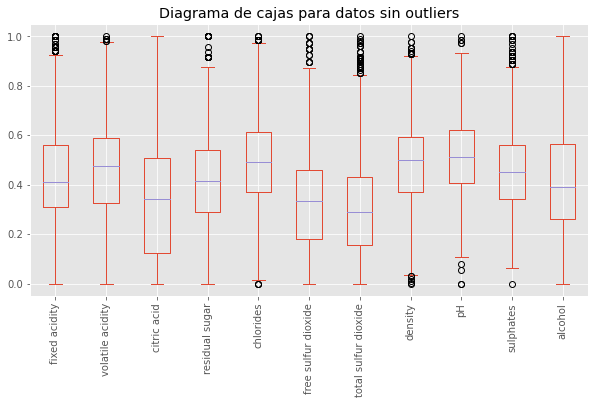

In [66]:
data_norm_iqr.plot(kind='box', figsize=(10, 5), rot=90)
plt.title('Diagrama de cajas para datos sin outliers')
plt.show()

Para realizar el análisis estadístico, se toman los datos limpios previamente manipulados. De está forma se cuenta con un dataset de 1142 filas. 

Se decidío utilizar el KS test con el fin de evaluar si alguna característica del dataset sigue una distribución de probabilidad específica. Para realizar la comparación, se tienen en cuenta las siguientes distribuciones: 

* Distribución Beta: Beta
* Distribución Gamma: Gamma
* Distribución Exponencial: Expon
* Distribución Chi-cuadrado: Chi2
* Distribución Normal: Norm
* Distribución t-Student: t
* Distribución Uniforme: Uniform

Al aplicar el test KS con la variable *density*, se encontró que la distribución t generó un $\rho_{value} > 0.05$. Esto nos indica que hay suficiente evidencia para determinar que la variable *density* sigue una distribución t, tal cómo se muestra en la siguiente gráfica.

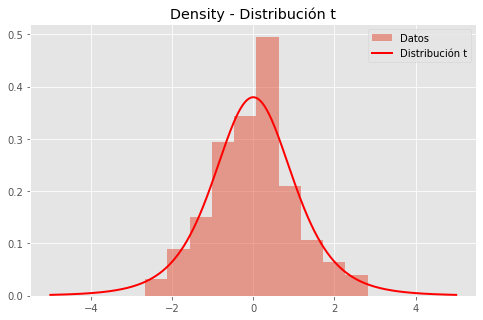

In [67]:
df = 5 

density = data_clean['density']

mean = np.mean(density)
std = np.std(density)
data_scaled = (density - mean) / std

plt.figure(figsize=(8, 5))

t_statistic, p_value = stats.kstest(data_scaled, 't', args=(df,))

plt.hist(data_scaled, density=True, alpha=0.5, label='Datos')
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df), 'r', lw=2, label='Distribución t')
plt.legend()
plt.title('Density - Distribución t')
plt.show()

Adicionalmente, se buscó la existencia de correlación lineal entre las características por medio del método de Pearson, qué además de darnos la correlación lineal, nos indica el p-valor entre cada característica. De esta forma se encontró que las siguientes características tienen correlación lineal.

In [68]:
cor[(cor > 0.55) | (cor < -0.55)]

citric acid           fixed acidity          0.606136
                      volatile acidity      -0.581952
total sulfur dioxide  free sulfur dioxide    0.601437
density               fixed acidity          0.550934
pH                    fixed acidity         -0.641993
dtype: float64

Para ajustar una densidad de probabilidad a la característica *density*, se utilizó el método de densidad kernel. Para encontrar dicha función, se requirió calcular el ancho de banda el cual nos arrojó un valor de $0.2$

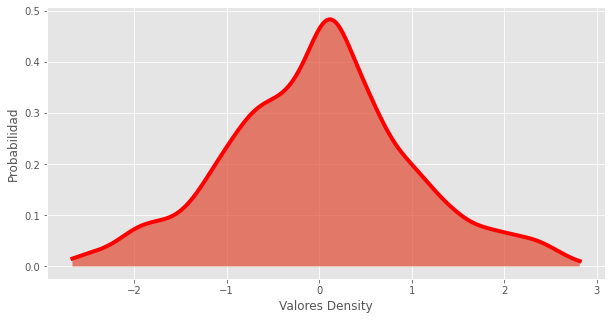

In [69]:
x_minimo = data_scaled.values.min()
x_maximo = data_scaled.values.max()
x = np.linspace(x_minimo, x_maximo, data_clean.shape[0])
Prob_Log = kde.score_samples(x.reshape(-1, 1))  

fig = plt.figure(figsize=(10, 5))

plt.fill_between(x, np.exp(Prob_Log), alpha=0.7)
plt.plot(x, np.exp(Prob_Log), 'r', linewidth=4)
plt.xlabel("Valores Density")
plt.ylabel("Probabilidad")
plt.show()

Finalmente, para encontrar una relación entre las variables cuantitativas, se utilizó el test-t con el fin de validar si las características una distribución normal. Tal cómo se ve en el siguiente informe, todas las características siguen dicha distribución.

In [70]:
valor_p > 0.05

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
normal,True,True,True,True,True,True,True,True,True,True,True,True


In [71]:
t_test = []
p_valor = []

for n in data_clean.columns:
    for m in data_clean.columns:  
        statistic, pvalue = ttest_ind(data_clean[n], data_clean[m])
        t_test.append(statistic)
        p_valor.append(pvalue)
        
t_test = np.asarray(t_test)
p_valor = np.asarray(p_valor)

t_students = t_test.reshape(data_clean.shape[1], data_clean.shape[1])
p_value = p_valor.reshape(data_clean.shape[1], data_clean.shape[1])

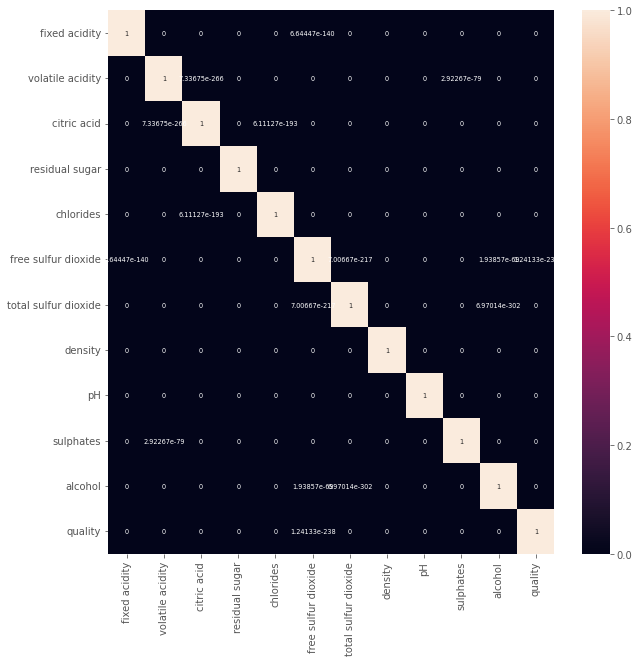

In [72]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    p_value, 
    annot=True, 
    fmt='g', 
    xticklabels=valor_p.columns, 
    yticklabels=valor_p.columns, 
    annot_kws={'size': 6.5})

plt.show()

Con el test-T para muestras independientes, no se encontró ninguna relación entre caracteríticas, ya que el valor p para todas estas es $<=0.05$ tal cómo se evidenció en el mapa de calor anterior.